# 머신러닝 - 분류(Classification)의 성능 평가 지표
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

## 3-1 Accuracy(정확도)
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
    - 정확도 = (예측 결과가 동일한 데이터 건수)/(전체 데이터 예측 건수)

- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가지표

In [1]:
import sklearn

print(sklearn.__version__)

1.0.2


사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 Classifier 생성

- 하지만 이는 정확도 지표가 ML 모델의 성능을 왜곡할 가능성을 보여주는 예시이다.
- 성별이 생존자 여부를 결정한다고 판단하기에 무리가 있기 때문이다.

In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None): # fit 함수 정의
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred


생성된 MyDummyClassifier 클래스를 이용해 타이타닉 생존자 예측 수행할 것임.

우선 타이타닉 데이터를 가공할 것

In [4]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


이렇게 단순한 알고리즘으로 예측 하더라도 데이터 구성에 따라 정확도가 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 신중해야함

***아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않을 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점이다.***

이를 코드로 확인해볼 것이다

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [10]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [11]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 정확도가 0.9라는 말도 안되는 결과이다.

### 이렇게 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다.

## Confusion Matrix (오차 행렬)
- 이진 분류에서 성능 지표로 잘 활용되며  학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다.
- 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.

![오차행렬](./confused_matrix.png)

### 4분면의 왼쪽, 오른쪽 구분 : 클래스 값 기준으로 Negative / Positive
### 4분면의 위, 아래 구분 : 실제 클래스 값 기준으로 Negative / Positve

- **예측 클래스와 실제 클래스 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차행렬을 채울 수 있다.**

    - TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
    - FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
    - FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
    - TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공한다.

In [13]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 오차 행렬에서의 정확도
### 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP) / (TN+FP+FN+TP)

- **다만,** TP, TF 중 한 값이 압도적으로 작은 것과 같은 비대칭한 데이터 세트에서는 한 쪽에 대한 예측 정확도만으로 분류 정확도가 매우 높게 나타나는 수치적 판단 오류 발생 가능

## 정밀도(Precision) 과 재현율(Recall)
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.

### 정밀도와 재현율의 계산
- **정밀도 = TP/(FP+TP)** # 예측을 Positive로 한 대상 중 예측값이 실제와 일치하는 데이터의 비율 [양성예측도]
- **재현율 = TP/(FN+TP)** # 실제값이 Positive로 한 대상 중 예측값이 실제와 일치하는 데이터의 비율 [민감도] [TPR]


### 정밀도와 재현율, 어떤 지표를 사용해야할까?

- 재현율 : 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - ex) 암 판단 모델 : 실제 positive 암 환자를 negative 음성으로 판단하게 되면 생명을 앗아갈 정도로 심각하기 때문
        - 이 모델은 대신 실제 FP(Negative)인 환자를 양성으로 판단하면 재검사하는 수준의 추가적 비용이 발생
    - ex) 보험 사기 모델 : 실제 금융 사기인 positive 건을 negative로 판단하게 되면 회사에 미치는 손해가 커진다
    
    **보통은 재현율이 정밀도보다 중요한 업무가 많지만 정밀도가 더 중요한 지표인 경우도 존재한다.**
    
    
    
- 정밀도 : 실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - ex) 스팸 메일 여부 확인 모델 : 실제 Positive인 스팸 메일을 negative로 분류하게 되면 불편함을 느끼는 정도이지만 실제 Negative 일반 메일을 Positive로 분류하면 메일을 아예 받지 못하는 경우 발생

### 마지막 정리
- 정밀도 재현율 둘다 TP를 높이는 데 초점을 맞춘다. 하지만...
    - 재현율은 FN을 낮추는데 초점을 맞춘다.
    - 정밀도는 FP를 낮추는데 초점을 맞춘다.
        - 둘다 높은 수치를 얻는 것이 바람직

**MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**
- 사이킷런에서는 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score()를 API로 제공

In [1]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

NameError: name 'y_test' is not defined

**오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [5]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


### Precision/Recall Trade-off
- 정밀도와 재현율은 서로 상호 보완적인 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.
- 이를 Trade_off라고 한다.

**predict_proba( ) 메소드 확인**

In [7]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타낸다. 첫번째 칼럼과 두번째 칼럼의 합은 1임을 의미한다.
- predict() 매서드는 predict_proba() 매서드에 기반하여 생성된 API이다.
    - 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정

**Binarizer 활용** : 반환된 ndarray에서 정해진 임계값(앞 예시에서는 0.5)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 설정

In [8]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [9]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


**분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

In [10]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


### 임계값을 낮추니 재현율이 올라가고 정밀도가 떨어짐, 그 이유는?
- 분류 결정 임곗값은 POSITIVE 예측값을 결정하는 확률의 기준이 된다.
- 확률이 0.5가 아닌 0.4부터 POSITIVE로 예측을 더 너그럽게 하기 때문에 TRUE 값이 많아지게 된다.


/w 재현율 : TP/(FN+TP), 정밀도 : TP/(FP+TP)

- TP가 47에서 50으로 증가
- FN이 14에서 11로 감소
- FP는 10에서 21로 증가

![tradeoff](./tradeoff.jpg)

**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [12]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60] # 점차 증가하는 임곗값

# 임곗값이 증가하므로 p 예측 비율이 줄어들 것이다
# 즉 재현율이 떨어지고 정밀도는 올라갈 것이다.

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


**precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출**

In [13]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573102 0.11636722 0.11819213 0.12102774 0.1234948 ]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


#### 임겠값이 증가할 수록 재현율이 떨어지는 것을 알 수 있다.

**임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

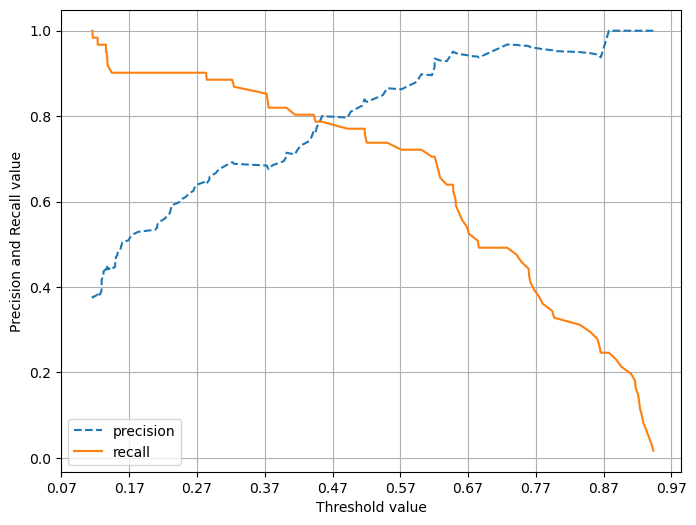

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


#### 임곗값을 계속 증가시킬수록 재현율 값은 낮아지고 정밀도 값이 높아지는 반대의 양상을 가진다.

### 3.4 F1 Score
- 정밀도와 재현율을 결합한 지표. 둘 중 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.

![F1score](./F1score.png)

In [15]:
from sklearn.metrics import f1_score # F1 score를 구하는 f1_score() API 제공
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))


F1 스코어: 0.7966


In [16]:
# 임겟값 별로 정밀도, 재현율, F1 score을 구하는 함수 작성

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


## 3-5 ROC Curve와 AUC : 이진분류의 예측 성능 측정에서 중요하게 사용되는 지표

- ROC Curve : 수신자 판단 곡선, FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는 지 나타내는 곡선
    - FPR을 x축, TPR을 y축으로 잡은 2차원 평면 곡선
        - TPR은 재현율을 나타낸다. 이는 민감도라고도 불린다. 이에 대응하는 지표로는 TNR(true negative rate)이라고 불리는 특이성이 있다.
        - TNR의 특이성은 TN/(FP+TN)으로 구할 수 있다. FPR은 1-TNR로 표현할 수 있다.
        

![ROC](./roc.png)

### 가운데 직선에 가까울수록 낮은 성능, 멀어질수록 우수한 성능

### 곡선은 FPR을 0부터 1까지 변경하며 TPR의 변화값을 구한다. 이는 분류 결정 임곗값을 변화하며 구할 수 있다.
- ex) FPR을 0으로 만드려면 임계값 1로 설정 / FPR을 1로 만드려면 임계값 0으로 설정

#### 사이킷런 라이브러리에서는 ROC 곡선을 구하기 위해 roc_curve() API 제공.

- 사용 방법은 precision_recall_curve()와 유사. 다만 반환값이 FPR, TPR, 임곗값으로 구성.

- 입력 파라미터
    - y_true: 실제 클래스 값 array (array shape = [데이터 건수])
    - y_score: predict_proba()의 반환값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. array.shape=[n_samples]
    
    
- 반환값
    - fpr : array 형태
    - tpr : array 형태
    - thresholds : array 형태

In [17]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

# 임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커진다. 그리고 이가 조금씩 커질때 TPR은 가파르게 커짐(초반에 변화율이 크다)

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


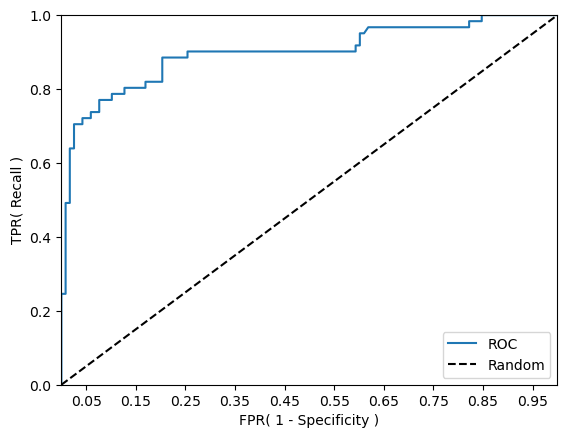

In [18]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


### ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
### AUC(Area Under Curve) 값은 RCP 곡선 밑의 면적을 구한 것으로 1에 가까울 수록 좋은 수치 

In [19]:
from sklearn.metrics import roc_auc_score # ROC AUC를 구하는 roc_auc_score API
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))


ROC AUC 값: 0.8987


#### get_clf_eval 함수에 roc_auc_score()를 이용해 ROC AUC를 측정하는 로직을 추가
#### 아래와 같은 parameter 설정으로 정확도, 정밀도, 재현율, F1 Score 및 ROC ALU 값까지 출력 가능

In [20]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


책 본문에는 없지만 이를 한번 테스트해보겠다.

In [23]:
get_clf_eval(y_test,pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705,          F1: 0.7966, AUC:0.8987
